In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


## Premier essai

In [4]:
def orientation_points(p,q,r):
    """
    Fonction pour déterminer l'orientation de trois points (p, q, r).
    Renvoie 0 si les points sont colinéaires, 1 si dans le sens des aiguilles d'une montre,
    -1 si dans le sens contraire des aiguilles d'une montre.
    """
    valeur = (q[0]-p[0])*(r[1]-p[1]) - (q[1]-p[1])*(r[0]-p[0])
    if valeur == 0:
        return 0
    elif valeur > 0:
        return 1
    else:
        return -1

In [5]:
def algo_Graham(points):
    n= len(points)
    if n<3:
        return False #car l'enveloppe convexe nécissite au moins 3 point
    # Triez les points par leur coordonnée y, puis x 
    points = sorted(points, key=lambda point: (point[1], point[0]))
    # Initialisez la pile pour stocker l'enveloppe convexe
    pile = [points[0], points[1]]
    for i in range(2, n):
        while len(pile) > 1 and orientation_points(pile[-2], pile[-1], points[i]) != -1:
            pile.pop()
        pile.append(points[i])

    return pile

    

In [6]:
# Exemple d'utilisation
points = [(0, 0), (1, 1), (2, 2), (0, 2), (1, -1)]
resultat = algo_Graham(points)
print("Enveloppe convexe:", resultat)

Enveloppe convexe: [(1, -1), (0, 0), (0, 2), (2, 2)]


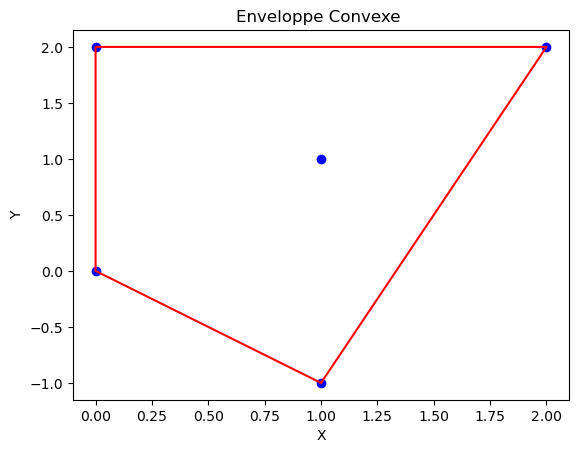

In [7]:
# Affichage des résultats
x, y = np.array(points).T

plt.plot(x, y, 'bo')

# Affiche l'enveloppe convexe
convex_pile = np.array(resultat + [resultat[0]])  
plt.plot(convex_pile[:, 0], convex_pile[:, 1], color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Enveloppe Convexe ')
plt.show()


In [8]:
# exemple 2 : cercle

points_cercle = [(4, 10), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (11, 11), (11, 12), (11, 13), (11, 14), (11, 15), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 12), (12, 13), (12, 14), (12, 15), (13, 5), (13, 6), (13, 7), (13, 8), (13, 9), (13, 10), (13, 11), (13, 12), (13, 13), (13, 14), (13, 15), (14, 6), (14, 7), (14, 8), (14, 9), (14, 10), (14, 11), (14, 12), (14, 13), (14, 14), (15, 7), (15, 8), (15, 9), (15, 10), (15, 11), (15, 12), (15, 13), (16, 10)]

In [9]:
res_cercle= algo_Graham(points_cercle)

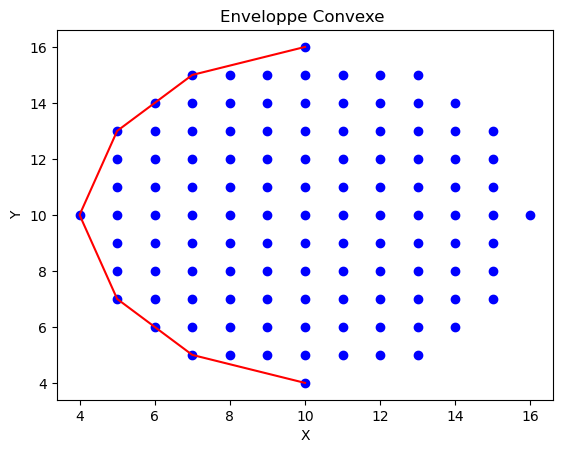

In [10]:
# Affichage des résultats
x, y = np.array(points_cercle).T

plt.plot(x, y, 'bo')

# Affiche l'enveloppe convexe
convex_pile = np.array(res_cercle)  
plt.plot(convex_pile[:, 0], convex_pile[:, 1], color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Enveloppe Convexe ')
plt.show()

##  Deuxième essai

In [17]:
def lit_bpm(nom):
    fichier = open(nom, 'r')
    tab = []
    n = 0
    liste2 = np.array([])
    for ligne in fichier :
        n+=1
        liste = ligne[:-1].split(' ')
        if n == 3:
            shape0, shape1 = int(liste[0]), int(liste[1])
        if n>=4:
            liste = liste[:-1]
            for element in liste :
                liste2 = np.append(liste2,int(element))
    liste2 = np.reshape(liste2,(shape0,shape1))
    return liste2

In [18]:
image3 = lit_bpm('image.pbm')

In [19]:
def distance(a,b):
    return np.sqrt(np.abs(a[0]-b[0])**2 + np.abs(b[1]-a[1])**2)

In [20]:
def angle(pole, x) :
    return math.degrees(np.angle(complex(x[0]-pole[0], x[1]-pole[1])))

In [21]:
def det(p,q,x):
    return (p[0]-q[0])*(q[1]-x[1]) - (q[0]-x[0])*(p[1]-q[1])

In [22]:
def trouver_point_depart(image):
    nb_lignes, nb_colonnes = np.shape(image)
    for i in range(nb_lignes):
        for j in range(nb_colonnes):
            if image[i,j] == 1 :
                return i,j

In [25]:
def liste_triee(image):
    """
    fonction qui prend en argument une image en noir et blanc et renvoie la liste de ses sommets avec en premiere position le points de départ puis les sommets triés par angle et distance avec le premier point
    """
    n,m = np.shape(image)
    depart = trouver_point_depart(image)
    dico = {}
    for i in range(1,n):
        for j in range(1,m):
            if i != depart[0] or depart[1] != 10 :
                if image[i,j]==1:
                    dico[(i,j)]= angle((depart[0],depart[1]),(i, j) ), distance((depart[0],depart[1]),(i, j) )
                    
    dico_angle = dict(sorted(dico.items(), key=lambda item:item[1][0]))
    liste_cles = np.array([cle for cle in dico_angle.keys()])
    liste_cles = np.insert(liste_cles, 0, [4,10], axis = 0)
    
    return liste_cles

In [26]:
liste_cles = liste_triee(image3)

In [27]:
def graham_v2000(sommets):
    pile = []
    n = np.shape(sommets)[0]
    if n > 3:
        pile.append(list(sommets[0]))
        pile.append(list(sommets[1]))
        pile.append(list(sommets[2]))
        for i in range(3,n-1):
            while (len(pile) > 2) and (det(pile[-2], pile[-1], sommets[i]) <= 0):
                pile.pop(-1)
            pile.append(list(sommets[i]))
    pile.append(list(sommets[-1]))
    pile.append(list(sommets[0]))
    return pile

In [28]:
res = graham_v2000(liste_cles)
# print(np.array(res))

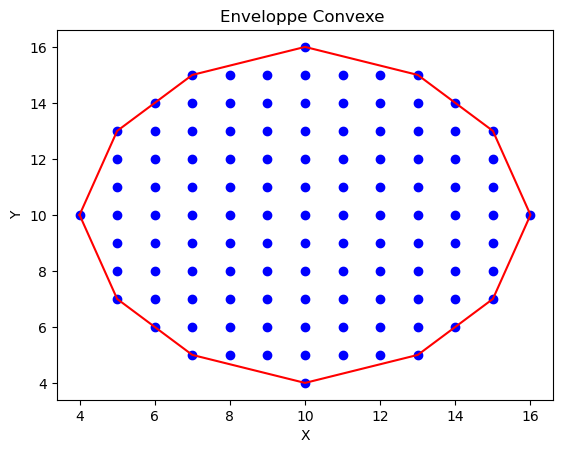

In [29]:
# Affichage des résultats
x, y = np.array(points_cercle).T

plt.plot(x, y, 'bo')

# Affiche l'enveloppe convexe
convex_pile = np.array(res)  
plt.plot(convex_pile[:, 0], convex_pile[:, 1], color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Enveloppe Convexe ')
plt.show()